# Drinking Water Quality Risk Classification Using ML

This project assesses drinking water safety using a machine learning framework trained on the publicly available “Water Potability” dataset from Kaggle. By predicting potable vs. non-potable water samples and visualizing risk determinants through a Power BI dashboard, the study generates actionable insights alongside a risk score report to support evidence-based water quality assessments.

## Dataset Description

| Variable        | Description                        |
| --------------- | ---------------------------------- |
| pH              | Water acidity/alkalinity           |
| Hardness        | Calcium & magnesium concentration  |
| Solids (TDS)    | Total dissolved solids (mg/L)      |
| Chloramines     | Chloramine level in mg/L           |
| Sulfate         | Sulfate concentration              |
| Conductivity    | Conductance of water               |
| Organic_carbon  | Organic carbon concentration       |
| Trihalomethanes | THMs — toxic compounds             |
| Turbidity       | Clarity of water                   |
| Potability      | Target label: 1 = safe, 0 = unsafe |


***Importing the Data-Set and Initial Data Checks***

In [3]:
## Importing Dataset

import pandas as pd

# Path to your uploaded file
file_path = "C:\\Users\\User\\Desktop\\Final_Projects\\Water_Project\\water_potability.xlsx"

# Load the dataset
df = pd.read_excel(file_path)

# Display first 5 rows
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# B. CHECK DATASET SHAPE


print("Shape of dataset:", df.shape)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Shape of dataset: (3276, 10)
Number of rows: 3276
Number of features: 10


In [5]:
##Checking for Missing Values

# Count of missing values per column
missing_count = df.isna().sum()

# Percentage of missing values per column
missing_percent = (df.isna().mean() * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
})

print("\nMissing Values Summary:")
print(missing_df)


Missing Values Summary:
                 Missing Count  Missing %
ph                         491      14.99
Hardness                     0       0.00
Solids                       0       0.00
Chloramines                  0       0.00
Sulfate                    781      23.84
Conductivity                 0       0.00
Organic_carbon               0       0.00
Trihalomethanes            162       4.95
Turbidity                    0       0.00
Potability                   0       0.00


In [7]:
# Create a copy for safety
df_filled = df.copy()

# Identify numeric columns to impute
num_cols = df_filled.select_dtypes(include=['float64', 'int64']).columns

# Median imputation (safe, warning-free)
for col in num_cols:
    median_val = df_filled[col].median()
    df_filled[col] = df_filled[col].fillna(median_val)

# Confirm remaining missing values
df_filled.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
##Creating a binary Risk-Flag Column

df_filled['high_turbidity'] = (df_filled['Turbidity'] > df_filled['Turbidity'].median()).astype(int)
df_filled['low_ph'] = (df_filled['ph'] < 6.5).astype(int)
df_filled['high_solids'] = (df_filled['Solids'] > df_filled['Solids'].median()).astype(int)

print("\nFinal dataset shape:", df_filled.shape)
df_filled.head()



Final dataset shape: (3276, 13)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,high_turbidity,low_ph,high_solids
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0,0,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0,1,1,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0,0,0,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1,0,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,1,0,0


## Exploratory Data Analysis

In [10]:
# After cleaning & feature engineering
df = df_filled.copy()

print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

Shape of dataset: (3276, 13)

Column names:
 ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability', 'high_turbidity', 'low_ph', 'high_solids']


In [11]:
##Summary Statistics
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,high_turbidity,low_ph,high_solids
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110,0.500000,0.295482,0.500000
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849,0.500076,0.456329,0.500076
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000,0.000000,0.000000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000,0.000000,0.000000,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000,0.500000,0.000000,0.500000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000,1.000000,1.000000,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000,1.000000,1.000000,1.000000


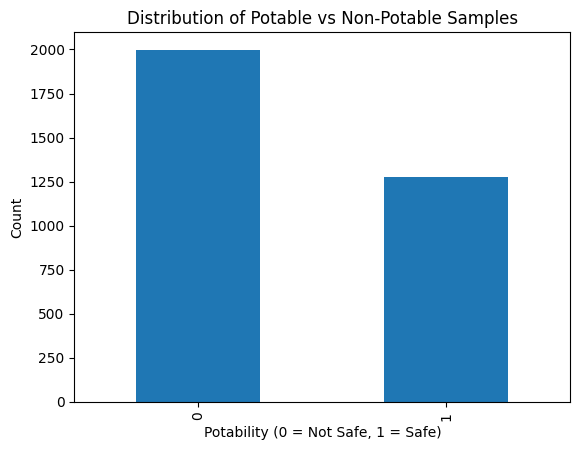

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

In [12]:
##Class Distribution
import matplotlib.pyplot as plt

df['Potability'].value_counts().plot(kind='bar')
plt.title("Distribution of Potable vs Non-Potable Samples")
plt.xlabel("Potability (0 = Not Safe, 1 = Safe)")
plt.ylabel("Count")
plt.show()

df['Potability'].value_counts(normalize=True)


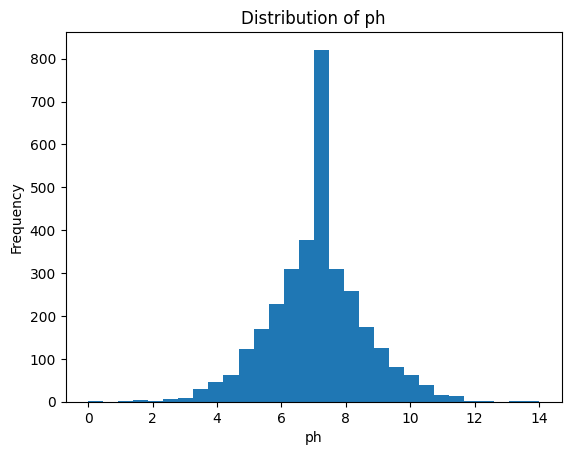

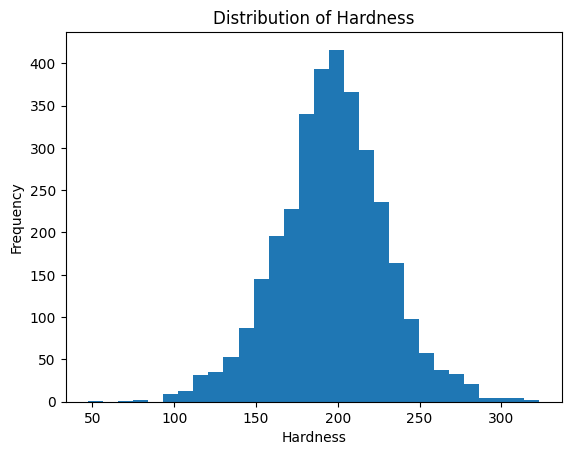

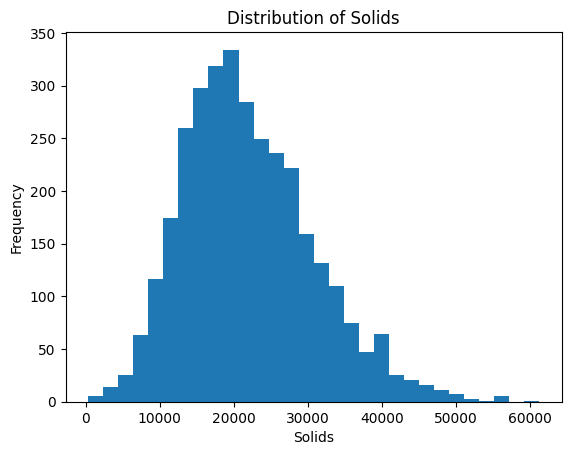

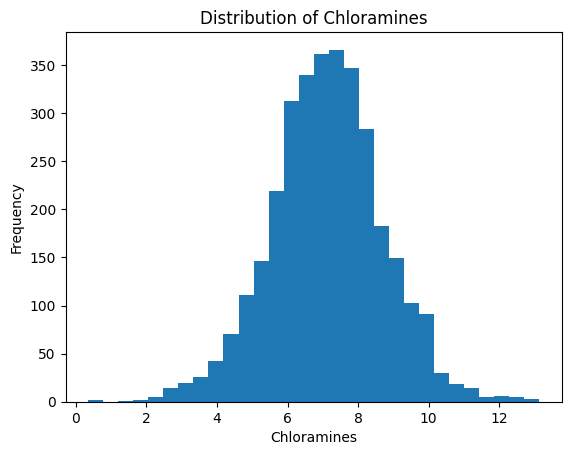

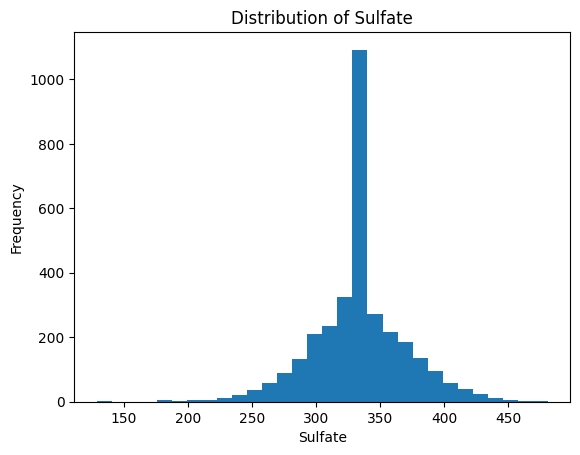

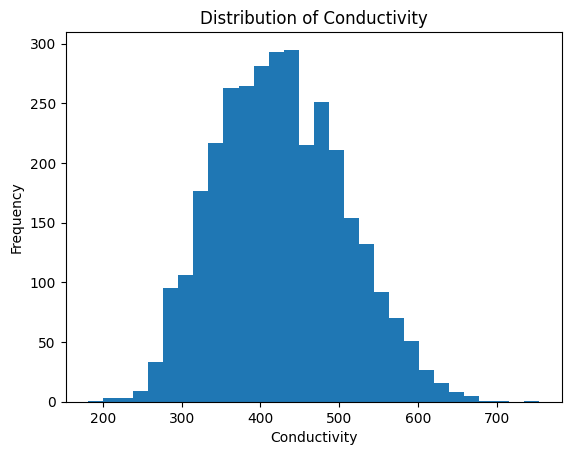

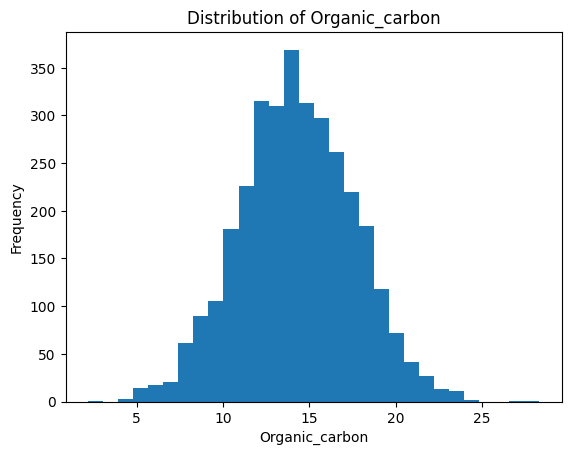

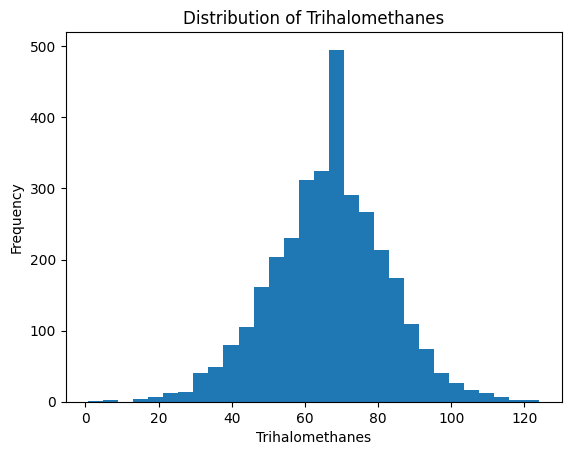

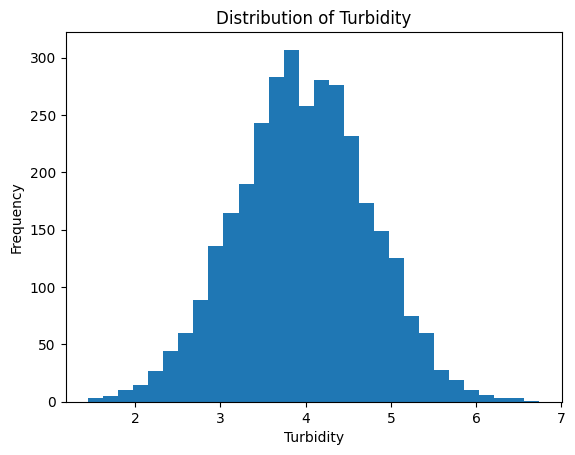

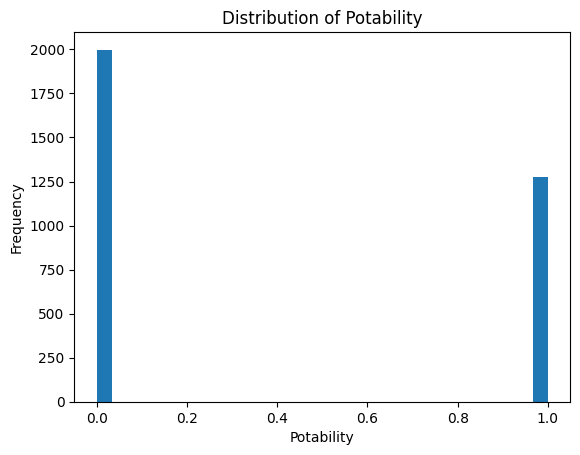

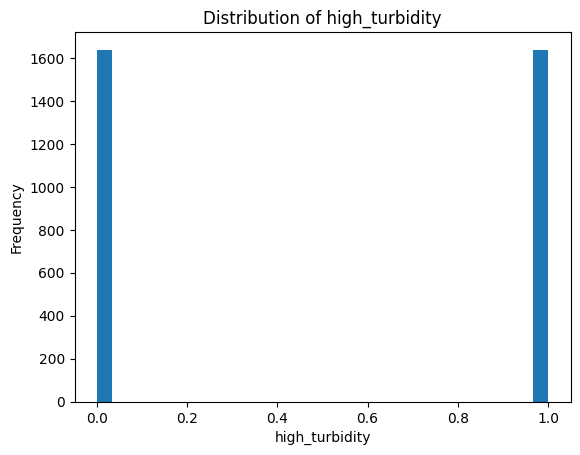

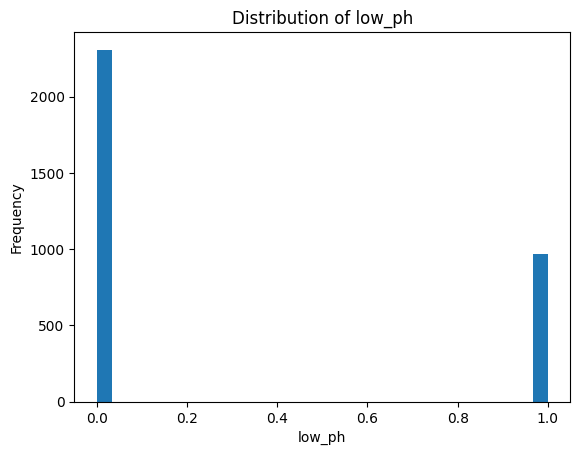

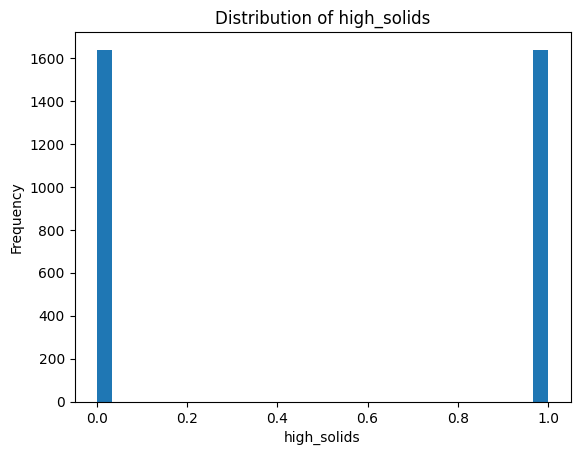

In [14]:
##Distribution Plots for Each Feature
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


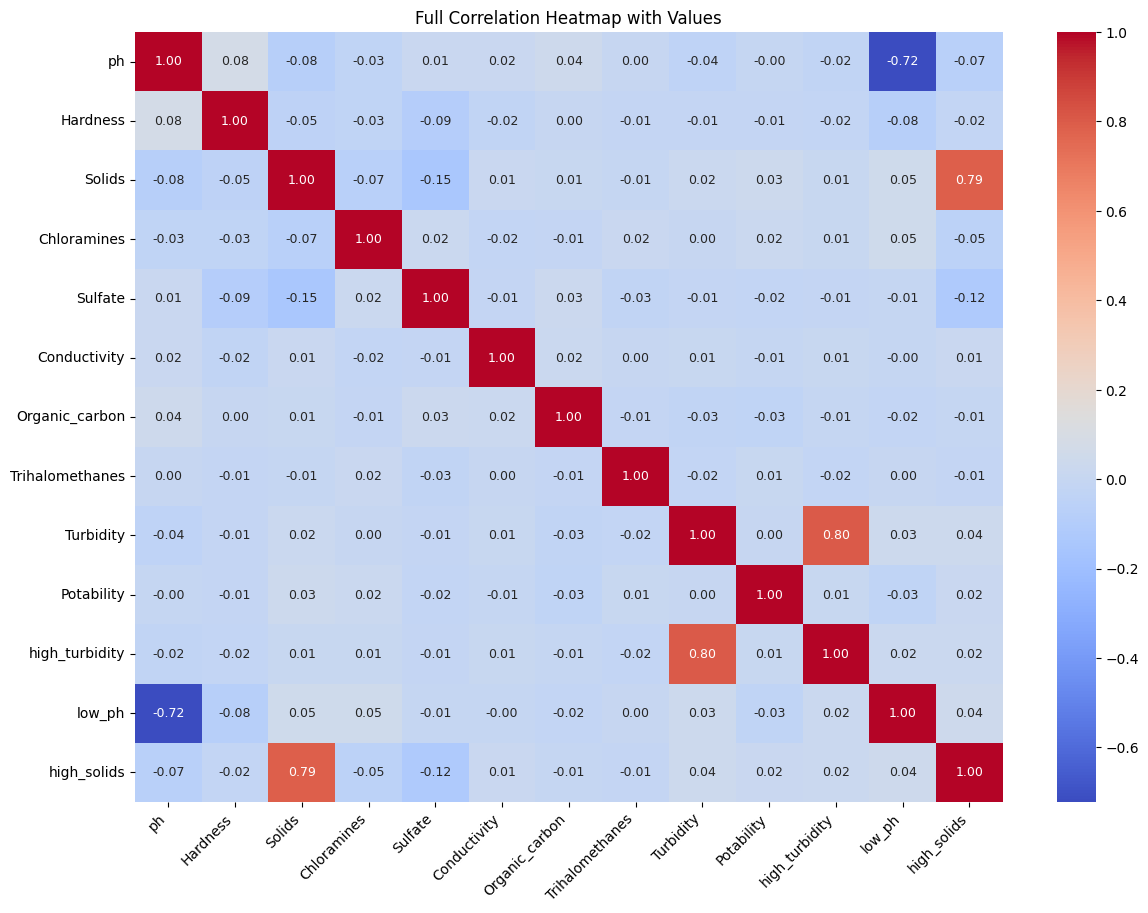

In [16]:
## Correlation Matrix
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size":9})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Full Correlation Heatmap with Values")
plt.show()


In [20]:
##Check Engineered Feature Behavior
summary = pd.DataFrame({
    "Potability_by_High_Turbidity": df.groupby('high_turbidity')['Potability'].mean(),
    "Potability_by_Low_pH": df.groupby('low_ph')['Potability'].mean(),
    "Potability_by_High_Solids": df.groupby('high_solids')['Potability'].mean()
})
summary

,Potability_by_High_Turbidity,Potability_by_Low_pH,Potability_by_High_Solids
0,0.387668,0.399480,0.381563
1,0.392552,0.367769,0.398657


## ML Modelling

## Train–Test Split

In [21]:
from sklearn.model_selection import train_test_split

# 1. Separate features and target
X = df_filled.drop('Potability', axis=1)
y = df_filled['Potability']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2620, 12)
Test shape: (656, 12)


## Feature Scaling (Standardization)

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data
scaler.fit(X_train)

# Transform both
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed.")


Scaling completed.


## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
## XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


## Evaluate All Models


In [26]:
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": (log_reg, X_test_scaled),
    "Random Forest": (rf, X_test),
    "XGBoost": (xgb, X_test)
}

for name, (model, X_data) in models.items():
    preds = model.predict(X_data)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))



Logistic Regression Accuracy: 0.6082
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656


Random Forest Accuracy: 0.6601
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       400
           1       0.64      0.29      0.40       256

    accuracy                           0.66       656
   macro avg       0.65      0.59      0.58       656
weighted avg       0.66      0.66      0.62       656


XGBoost Accuracy: 0.6540
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       400
           1       0.59      0.36      0.44       256

    accuracy                           0.65       656
   macro avg       0.63      0.6

Random Forest achieved the best overall performance (Accuracy = 66%), outperforming Logistic Regression and XGBoost. While all models struggled with detecting potable water due to data imbalance and overlapping chemical indicators, Random Forest provided the best balance between precision and recall. Logistic Regression failed to detect potable water entirely, confirming the importance of non-linear models for environmental datasets.

## Generate Risk Score

In [30]:
# Select the best model (based on evaluation)
best_model = rf    

# Generate probability of water being unsafe 
df['Risk_Score'] = best_model.predict_proba(X)[:, 0]

# Export final dataset with risk scores
df.to_csv("water_risk_scores.csv", index=False)

print("Risk score CSV generated successfully!")


Risk score CSV generated successfully!


**How to Interpret Risk Score Values**
- Risk_Score close to 1.0 → High likelihood water is unsafe

- Risk_Score close to 0.0 → High likelihood water is safe


## Summary & Conclusion

The machine learning models were trained to classify water samples based on the correct potability label, where 1 = safe and 0 = unsafe.
After evaluating multiple algorithms, the best-performing model was used to compute a Risk Score, defined as the probability that water is unsafe (Potability = 0).

This provides a meaningful, public-health-oriented metric for identifying high-risk water sources and supports actionable insights for targeted intervention and water-quality management.

This file will be utilized for visualization in Power BI.